In this project, we'll be looking at data for apartments in Manhattan. We'll look at descriptive statistics for different apartment characteristics, create graphs visualizing the data using matplotlib and seaborn, and create a multilinear regression model using scikit-learn to create a model to predict rent prices.

We'll start by importing the necessary python libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next we'll import the data we'll use, which comes from StreetEasy, and turn into into a pandas dataframe:

In [2]:
# Import the csv as a Pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv')

# Print the first 5 rows
print(df.head())

   rental_id  building_id   rent  bedrooms  bathrooms  size_sqft  \
0       1545     44518357   2550       0.0          1        480   
1       2472     94441623  11500       2.0          2       2000   
2      10234     87632265   3000       3.0          1       1000   
3       2919     76909719   4500       1.0          1        916   
4       2790     92953520   4795       1.0          1        975   

   min_to_subway  floor  building_age_yrs  no_fee  has_roofdeck  \
0              9    2.0                17       1             1   
1              4    1.0                96       0             0   
2              4    1.0               106       0             0   
3              2   51.0                29       0             1   
4              3    8.0                31       0             0   

   has_washer_dryer  has_doorman  has_elevator  has_dishwasher  has_patio  \
0                 0            0             1               1          0   
1                 0            0  

Let's look at where the properties are located by borough:

In [3]:
# Print the distinct values in the "borough" column
df.borough.unique()

array(['Manhattan', 'Queens', 'Brooklyn'], dtype=object)

As we can see, the dataset includes properties across Manhattan, Queens, and Brooklyn. Let's limit our analysis to only properties in Manhattan:

In [4]:
# Create a new dataframe for only Manhattan properties
manhattan = df[df.borough == 'Manhattan']

Let's get more information about the properties in Manhattan. First, let's see how many properties there are:

In [5]:
# Find the number of properties in Manhattan
manhattan_count = manhattan.rental_id.count()

manhattan_count

3539

There are 3539 properties. Looking at the entire list of properties across all boroughs:

In [6]:
# Look up the total number of properties across all boroughs
total_count = df.rental_id.count()

# Divide the number of Manhattan properties
print(str(manhattan_count/total_count * 100) + '%')

70.78%


Manhattan properties make up almost 71% of all properties in the database. Now let's get more information about the rent in Manhattan:

In [7]:
# Generate descriptive statistics of the rent column
manhattan.rent.describe()

count     3539.000000
mean      5138.940379
std       3162.824760
min       1300.000000
25%       3150.000000
50%       4000.000000
75%       6000.000000
max      20000.000000
Name: rent, dtype: float64

The average rent is about \\$5140. The lowest rent was \\$1300, and the maximum was \\$20,000. We can see that 50
of properties have a rental price below \\$4000, and 75% of all properties are below \\$6000.

Let's visualize this:

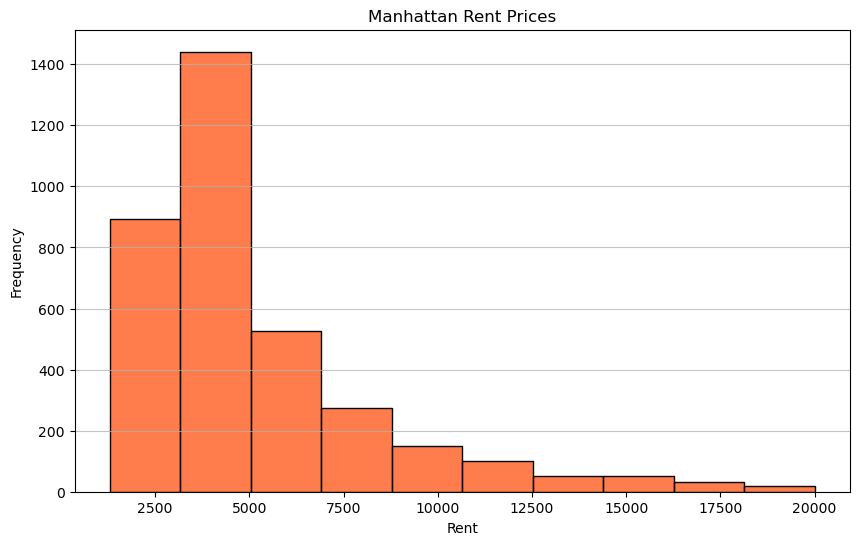

In [8]:
# Create a histogram of Manhattan rent prices and their frequency
plt.figure(figsize=(10, 6))
sns.histplot(manhattan['rent'], bins=10, kde=False, color = '#FF4500', edgecolor='black', alpha=0.7)
plt.title('Manhattan Rent Prices')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

The histogram shows significant positive skew, indicating that there are a significant number of outliers that are inflating the value of the mean rent. The median rent, \\$4000, gives a more accurate description than the mean in this case.

Now let's look at distribution by the number of bedrooms in each apartment:

In [9]:
# Get descriptive statistics about the number of bedrooms in Manhattan apartments
manhattan.bedrooms.describe()

count    3539.000000
mean        1.351936
std         0.967595
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: bedrooms, dtype: float64

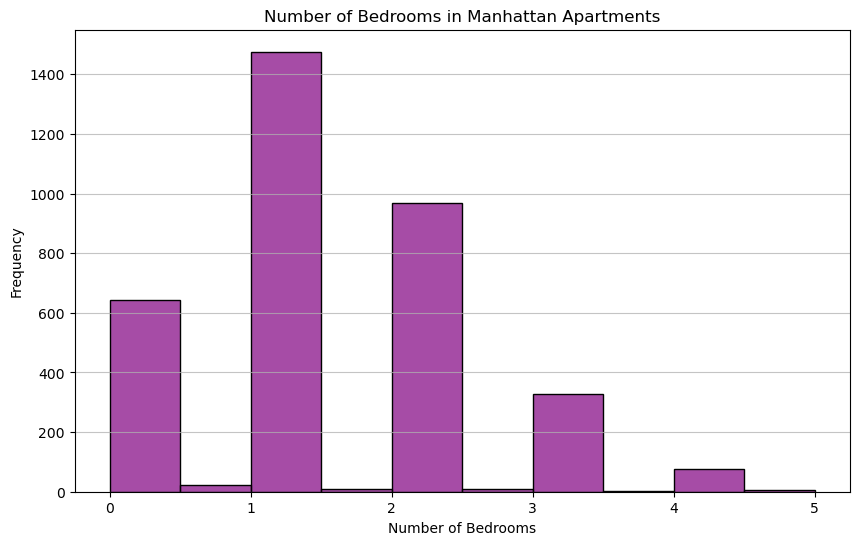

In [10]:
# Create a histogram of Manhattan apartments by frequency of # of bedrooms
plt.figure(figsize=(10, 6))
sns.histplot(manhattan['bedrooms'], bins=10, kde=False, color = 'purple', edgecolor='black', alpha=0.7)
plt.title('Number of Bedrooms in Manhattan Apartments')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

This requires a bit of explanation. Looking at the different values in this column, we see:

In [11]:
# Look at the unique values of Manhattan bedrooms
manhattan.bedrooms.unique()

array([0. , 2. , 1. , 3. , 0.5, 2.5, 4. , 5. , 3.5, 1.5])

This indicates that some apartments have rooms that do not meet the definition in the legal code for a bedroom.

In [12]:
# Get the frequency of each unique value in the "bedrooms" column
manhattan.bedrooms.value_counts()

1.0    1476
2.0     969
0.0     642
3.0     327
4.0      75
0.5      24
2.5       8
1.5       8
5.0       7
3.5       3
Name: bedrooms, dtype: int64

We see that 1-bedroom apartments are significantly more prevalent in Manhattan than 2-bedrooms or studios (0 bedrooms).

Let's look at the average size of apartments in Manhattan:

In [13]:
# Get descriptive statistics about the number of square footage in Manhattan apartments
manhattan.size_sqft.describe()

count    3539.000000
mean      939.727324
std       477.949074
min       250.000000
25%       613.000000
50%       800.000000
75%      1141.000000
max      4800.000000
Name: size_sqft, dtype: float64

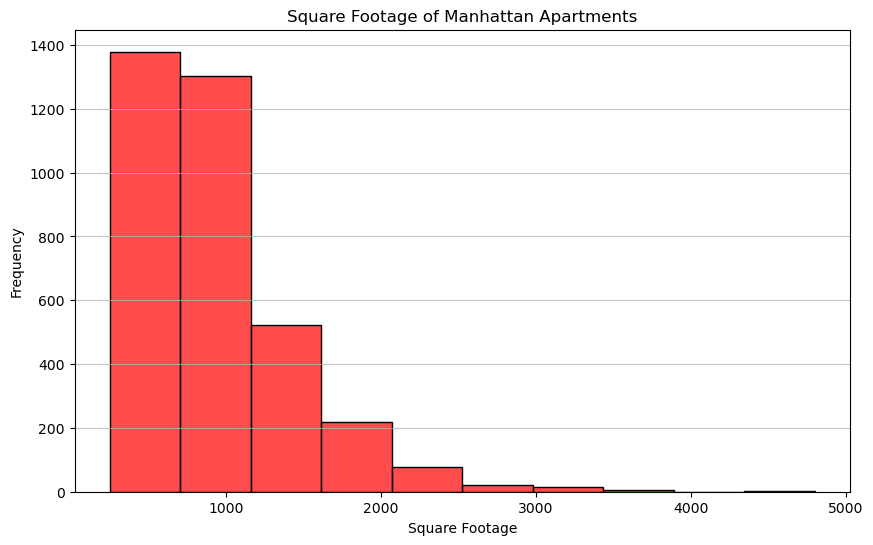

In [14]:
# Create a histogram of Manhattan apartments by range of square footage
plt.figure(figsize=(10, 6))
sns.histplot(manhattan['size_sqft'], bins=10, kde=False, color = 'red', edgecolor='black', alpha=0.7)
plt.title('Square Footage of Manhattan Apartments')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

We see an even more drastic positive skew than for rent. 50% of Manhattan apartments are under 800 square feet, while 75% are under 1150 sq ft.

Now let's look at some correlations. First, let's consider rental price relative to proximity to the subway:

In [15]:
# Get descriptive statistics about apartments' distance to the subway
manhattan.min_to_subway.describe()

count    3539.000000
mean        4.970896
std         5.513589
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        43.000000
Name: min_to_subway, dtype: float64

75% apartments are less than 6 minutes from a subway station.

Since we have so many points, adjusting the alpha value allows us to better visualize density (number of points in a specific region).

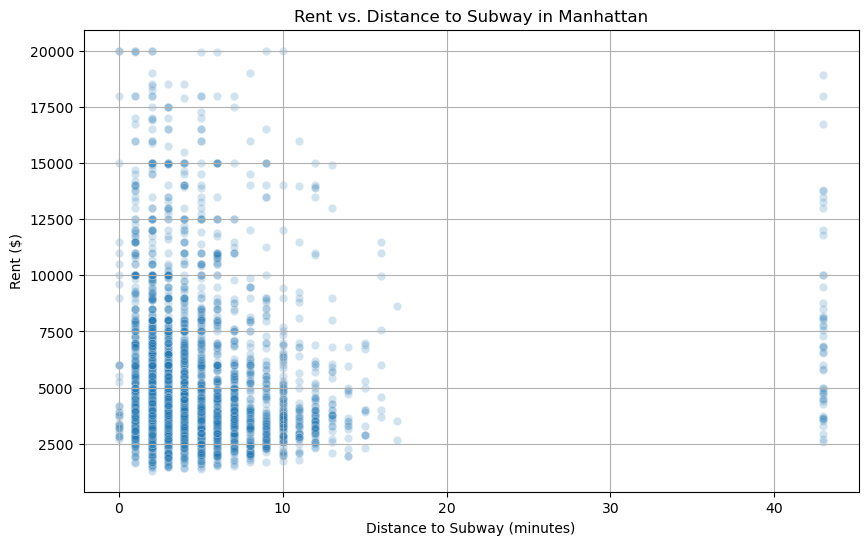

In [16]:
# Create a scatter plot using seaborn with adjusted plot size
plt.figure(figsize=(10, 6))  # Increase the figure size
sns.scatterplot(data=manhattan, x='min_to_subway', alpha = .2, y='rent')
plt.title('Rent vs. Distance to Subway in Manhattan')
plt.xlabel('Distance to Subway (minutes)')
plt.ylabel('Rent ($)')
plt.grid(True)

# Show the plot
plt.show()

As we can see, there's a huge concentration of points, indicating that most of the properties in Manhattan aren't that different in distance across a fairly large rent range (from under \\$2000 to over \\$5000). It is difficult to find a noticeable correlation based on this dataset alone.

Let's calculate how different attributes contribute to rent prices. For this, we can use a multilinear regression model in scikit-learn. But first, we need to create a new dataframe since some of the columns in the Manhattan dataframe won't be needed. We'll call the dataframe with only columns we want to include, regr_data. **Note:** we don't want the rent column to be included in this set, because this is the value we're trying to *predict* based on the other values:

In [17]:
# Create a new dataframe with only the columns we'll be using for our regression model
regr_data = manhattan[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym']]

# Display the dataframe
regr_data

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
3,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
4,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
7,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1
4996,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1
4997,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0
4998,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1


Now we can start creating our model. First, let's import the necessary modules in scikit-learn. We'll be breaking up our data into a training set and a test set:

In [18]:
# Import the train_test_split module
from sklearn.model_selection import train_test_split

Since we're interested in predicting rent, this will be the y-value of our regression model:

In [19]:
# Store rent prices as the y-variable
y = manhattan[['rent']]

We'll use the standard division of our dataset where 80% of the data will be used to train, and 20% will be used to test:

In [20]:
# Create training and testing sets proportions for x-values and y-values, along with a random_state
x_train, x_test, y_train, y_test = train_test_split(regr_data, y, train_size = .8, test_size = .2, random_state = 6)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
mlr = LinearRegression()

mlr.fit(x_train, y_train)

LinearRegression()

In [23]:
# Create a variable storing the values the model outputs when the x_test set is used as inputs
y_predicted = mlr.predict(x_test)

In [24]:
# Verify data is in the form of a numpy array
y_test = np.array(y_test)
y_predicted = np.array(y_predicted)

# Correct dimensions of arrays
y_test = np.squeeze(y_test)
y_predicted = np.squeeze(y_predicted)

Now let's compare the difference between the actual rent prices of the test set (stored in the variable y_test) and the values the model predicts for x_test (y_predicted). We'll use a scatter plot to visualize this:

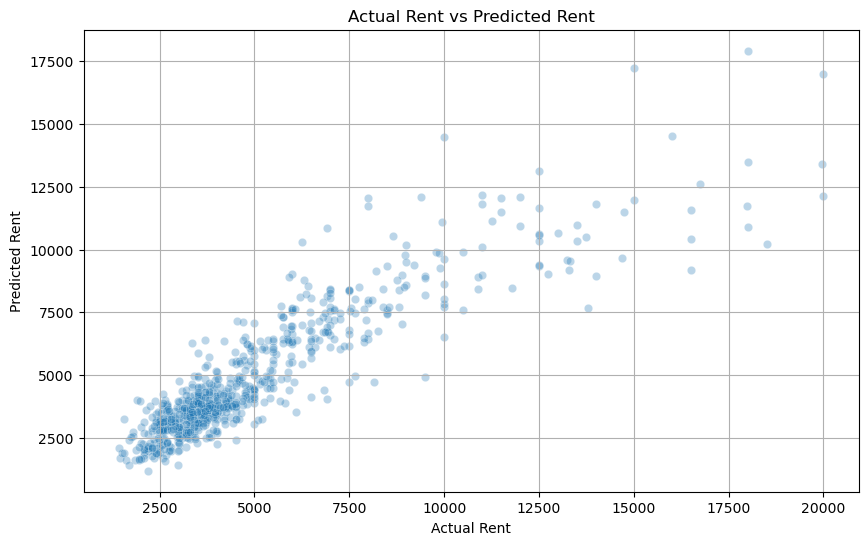

In [25]:
# Create a scatter plot using seaborn with adjusted plot size
plt.figure(figsize=(10, 6))  # Increase the figure size
sns.scatterplot(x = y_test, y = y_predicted, alpha = .3)
plt.grid(True)
plt.title("Actual Rent vs Predicted Rent")
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')

# Show the plot
plt.show()

From our plot, we can see a very strong linear correlation. We also see a much larger cluster of points in the range of rent prices where we find the largest number of apartments.

Now, let's look at the model's coefficients and intercept. This is a **multilinear regression** so for every input value used to tune our model, there is a corresponding coefficient. For n parameters, this becomes:

$$y = b + m_1x_1 + m_2x_2 + ... + m_nx_n$$  

To access these for our model:

In [26]:
# Print coefficients
mlr.coef_

array([[-302.73009383, 1199.3859951 ,    4.79976742,  -24.28993151,
          24.19824177,   -7.58272473, -140.90664773,   48.85017415,
         191.4257324 , -151.11453388,   89.408889  ,  -57.89714551,
         -19.31948556,  -38.92369828]])

To make sense of this, we need to know which value corresponds to which column of the dataframe from which we pulled our data:

In [27]:
# Create columns "coefficients" and "feature_names"
coefficients = np.array(mlr.coef_)
feature_names = np.array(regr_data.columns)

# Correct dimensionality
coefficients = np.squeeze(coefficients)
feature_names = np.squeeze(feature_names)

# Create DataFrame to display coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Show dataframe
coefficients_df

,Feature,Coefficient
0,bedrooms,-302.730094
1,bathrooms,1199.385995
2,size_sqft,4.799767
3,min_to_subway,-24.289932
4,floor,24.198242
5,building_age_yrs,-7.582725
6,no_fee,-140.906648
7,has_roofdeck,48.850174
8,has_washer_dryer,191.425732
9,has_doorman,-151.114534


This way, it is easier to reference the coefficient for a particular feature visually in case we want to do further work with our model.

To get the intercept term, we use:

In [28]:
# Display the intercept term of the linear regression model
mlr.intercept_

array([-344.68587986])

It's also important to have a way to evaluate the accuracy of the model. One way that we can do this is with residual analysis, where we measure the difference between the predicted values and the actual values:

$$ e = y_{actual} - y_{predicted} $$

and then use the $R^2$ regression method to get a sense of how much of our data is captured by the model. Fortunately, scikit-learn provides a built-in method to calculate this:

In [29]:
# Call and display the R^2 regression scores for the data
print(mlr.score(x_train, y_train))

print(mlr.score(x_test, y_test))

0.7725460559817883
0.8050371975357635


The model accounts for ~77% of the training data and ~81% of the test data.